In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [6]:
x_train = x_train.astype('float32') / 255.0 
x_test = x_test.astype('float32') / 255.0

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, 10) 
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [11]:
model = tf.keras.Sequential() 
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D((2,2))) 
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D((2,2))) 
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu')) 
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(64, activation='relu')) 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 67s 104ms/step - loss: 1.7099 - accuracy: 0.3658 - val_loss: 1.4155 - val_accuracy: 0.4888
Epoch 2/10
625/625 [==============================] - 54s 86ms/step - loss: 1.3342 - accuracy: 0.5187 - val_loss: 1.2499 - val_accuracy: 0.5540
Epoch 3/10
625/625 [==============================] - 61s 98ms/step - loss: 1.1715 - accuracy: 0.5835 - val_loss: 1.1245 - val_accuracy: 0.6060
Epoch 4/10
625/625 [==============================] - 46s 74ms/step - loss: 1.0649 - accuracy: 0.6228 - val_loss: 1.0565 - val_accuracy: 0.6287
Epoch 5/10
625/625 [==============================] - 49s 78ms/step - loss: 0.9801 - accuracy: 0.6530 - val_loss: 1.0033 - val_accuracy: 0.6521
Epoch 6/10
625/625 [==============================] - 50s 81ms/step - loss: 0.9197 - accuracy: 0.6778 - val_loss: 0.9586 - val_accuracy: 0.6663
Epoch 7/10
625/625 [==============================] - 53s 84ms/step - loss: 0.8616 - accuracy: 0.6967 - val_loss: 0.9906 - val_accuracy

In [14]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
'dog', 'frog', 'horse', 'ship', 'truck']

In [20]:
index = int(input("Enter an index (0 to 9999) for test image: ")) 
if index < 0 or index >= len(x_test):
    print("Invalid index. Using index 0 by default.") 
    index = 0

Enter an index (0 to 9999) for test image:  113


In [21]:
test_image = x_test[index] 
true_label = np.argmax(y_test[index])

In [22]:
prediction = model.predict(np.expand_dims(test_image, axis=0)) 
predicted_label = np.argmax(prediction)

1/1 [==============================] - 0s 74ms/step


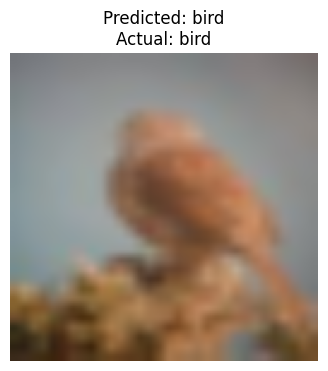

In [23]:
plt.figure(figsize=(4, 4)) 
resized_image = tf.image.resize(test_image, [128, 128])  
plt.imshow(resized_image) 
plt.axis('off') 
plt.title(f"Predicted: {class_names[predicted_label]}\nActual: {class_names[true_label]}") 
plt.show()